In [13]:
def get_time_series_graph(stock):
    
    #import package
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import dates, ticker, style
    import matplotlib as mpl
    from mpl_finance import candlestick_ohlc
    import matplotlib.dates as mdates
    from matplotlib import pylab
    import pylab
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #get data
    df = pd.read_csv('stock_price_list.csv',delimiter='\t')
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df=df.set_index('Date')
    
    #time series plot
    pylab.rcParams['figure.figsize'] = (15, 9)
    plot1=df[stock].plot(grid = True) 
    plt.xlabel('Date')  
    plt.ylabel('Close Price($)')  
    plt.title('time series plot')
    return plot1

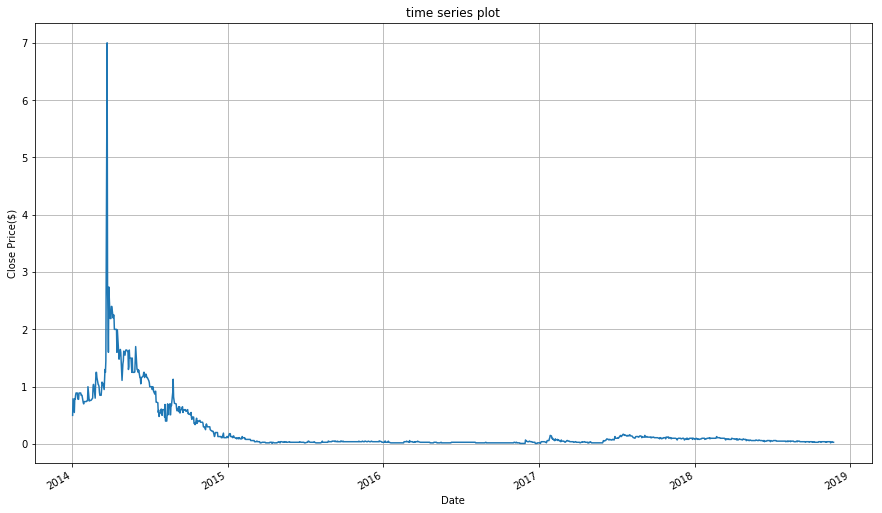

In [14]:
get_stock_graph('DDDX')

In [21]:
def get_stock_return_graph(stock):
    
    #import package
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import dates, ticker, style
    import matplotlib as mpl
    from mpl_finance import candlestick_ohlc
    import matplotlib.dates as mdates
    from matplotlib import pylab
    import pylab 
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #get data
    df = pd.read_csv('stock_price_list.csv',delimiter='\t')
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df=df.set_index('Date')
    
    #stock’s return since the beginning of the period of interest
    #return(t) = price(t)-price(0)
    stock_return = df.apply(lambda x: x / x[0])
    
    #plot return of stocks
    pylab.rcParams['figure.figsize'] = (15, 9)
    plot2=stock_return[stock].plot(grid = True).axhline(y = 1, 
                                           color = "black", 
                                           lw = 2)
    plt.xlabel('Date')  
    plt.ylabel('Close Price ($)')  
    plt.title('Return of Stocks')
    return plot2

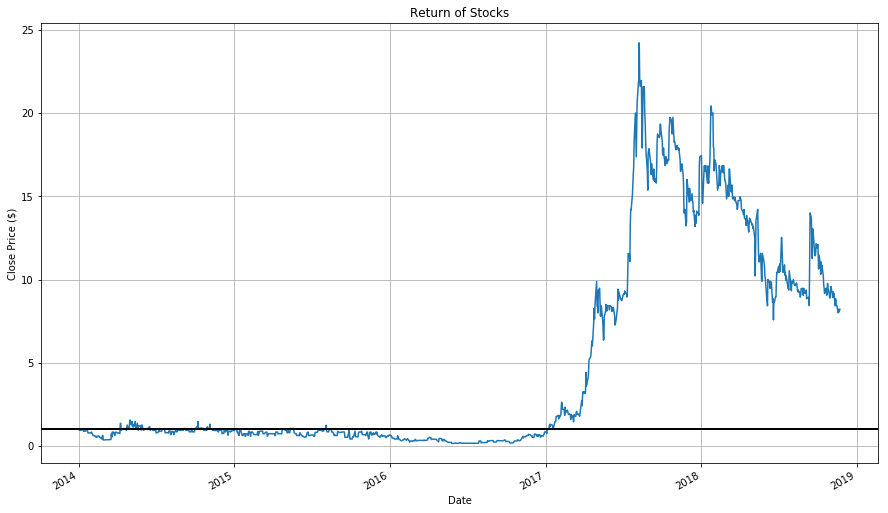

In [22]:
get_stock_return_graph('AMFE')

In [23]:
def get_stock_return_graph(stock):
    
    #import package
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import dates, ticker, style
    import matplotlib as mpl
    from mpl_finance import candlestick_ohlc
    import matplotlib.dates as mdates
    from matplotlib import pylab
    import pylab 
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #get data
    df = pd.read_csv('stock_price_list.csv',delimiter='\t')
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df=df.set_index('Date')
    
    #log differences of the price of stocks
    #In thelong run, use log difference of stock close price to predict rate of return
    #change(t)=log(price(t))-log(price(t-1))
    stock_rt = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
    
    #plot rate of return
    pylab.rcParams['figure.figsize'] = (15, 9)
    plot3=stock_rt[stock].plot(grid = True).axhline(y = 0, 
                                       color = "black", 
                                       lw = 3)
    plt.xlabel('Date')  
    plt.ylabel('Close Price ($)')  
    plt.title('Long Run Rate of Return')
    return plot3

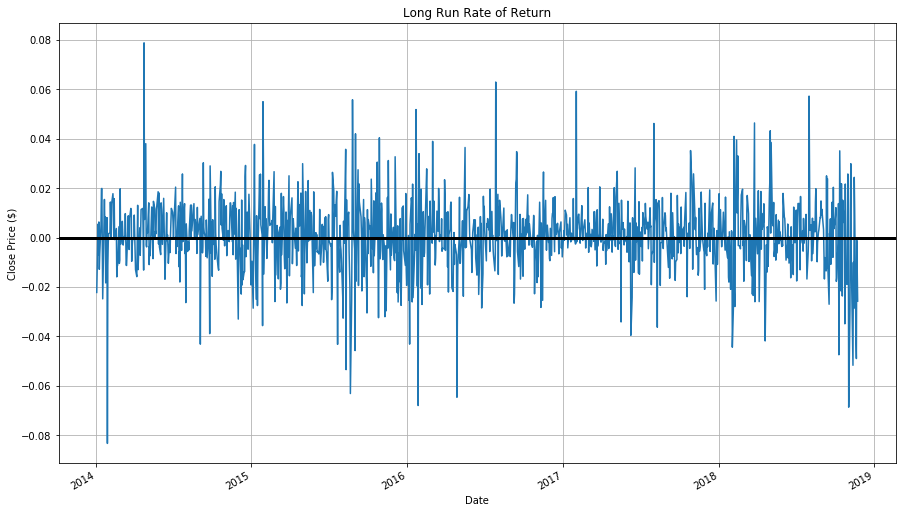

In [24]:
get_stock_return_graph('AAPL')

In [26]:
def get_stock_candlestick_graph(stock):
    
    #import package
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import dates, ticker, style
    import matplotlib as mpl
    from mpl_finance import candlestick_ohlc
    import matplotlib.dates as mdates
    from matplotlib import pylab
    import pylab 
    import matplotlib.pyplot as plt
    %matplotlib inline
    import datetime
    from pandas_datareader import data as web
    import fix_yahoo_finance as yf
    
    #get data
    start = datetime.datetime(2014,1,2)
    end = datetime.datetime(2018,11,23)
    all_df = web.DataReader(['AAPL', 'AMFE','AVEO','CEI','COOP','CRMD','CSRH','CTL','CVM','CVS','DDDX','FB','FNHI','FTNW','GGII','GLTC','HMNY','JE','MDT','MSMY','NULGF','NVDA','ORC','RIBT','ROX','SYCRF','TPL','VCSY','WYNN'],'yahoo', start,end)
    a_df = web.DataReader(stock,'yahoo', start,end)
    
    #resample data into a new data with 10 days as a unit
    style.use('ggplot')
    df_ohlc=a_df['Adj Close'].resample('10D').ohlc()
    df_volume = a_df['Volume'].resample('10D').sum()
    df_ohlc.reset_index(inplace=True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    
    #stock candlestick plot over time
    #visualize the open, close, high, low price for stock over time
    ax1 = plt.subplot2grid((6,1),(0,0),
                           rowspan=5,
                           colspan=1)
    ax2 = plt.subplot2grid((6,1),(5,0),
                           rowspan=1,
                           colspan=1,
                           sharex=ax1)
    ax1.xaxis_date()


    candlestick_ohlc(ax1,df_ohlc.values,
                     width=2,
                     colorup='b')
    ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
    plot4=plt.show()
    return plot4

    

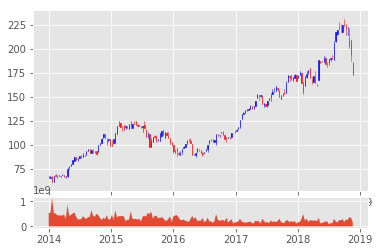

In [27]:
get_stock_candlestick_graph('AAPL')